In [1]:
import pandas as pd

In [3]:
path = 'raw_data.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
print(data.shape)

(3146, 8)


In [16]:
print(data.head())

   Day  Month  Year   Rice  Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  \
0    1      1  2016  29.50  30.50         26.67     70.50         155.00   
1    1      1  2017  34.80  31.20         31.00    134.60          98.20   
2    1      1  2018  37.00  30.67         30.00     72.33          71.67   
3    1      1  2019  33.60  33.60         35.40     72.20          76.00   
4    1      1  2020  46.17  35.00         35.50     67.50          94.83   

        Date  
0 2016-01-01  
1 2017-01-01  
2 2018-01-01  
3 2019-01-01  
4 2020-01-01  


In [17]:
# add new column 'data' to the data by combining 'Day', 'Month', 'Year'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [12]:
# print missing dates in the data
start_date = data['Date'].min()
end_date = data['Date'].max()
all_dates = pd.date_range(start=start_date, end=end_date)
missing_dates = all_dates.difference(data['Date'])
print(missing_dates)

DatetimeIndex(['2016-09-16', '2016-12-06', '2017-01-20', '2017-04-25',
               '2017-12-26', '2018-08-08', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2021-05-06', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06'],
              dtype='datetime64[ns]', freq=None)


In [14]:
# add missing dates to the data
missing_data = pd.DataFrame()
missing_data['Date'] = missing_dates
missing_data['Year'] = missing_data['Date'].dt.year
missing_data['Month'] = missing_data['Date'].dt.month
missing_data['Day'] = missing_data['Date'].dt.day

data = pd.concat([data, missing_data], ignore_index=True)

In [18]:
print('Missing values in raw_data.csv:')
print(data.isnull().sum())

Missing values in raw_data.csv:
Day               0
Month             0
Year              0
Rice             25
Wheat            25
Atta (Wheat)     25
Gram Dal         25
Tur/Arhar Dal    25
Date              0
dtype: int64


In [22]:
# fill missing values using mean and median of the month in sepatare dataframes
data_mean = data.copy()
data_median = data.copy()

# fill values for missing dates using mean and median of the month
for date in missing_dates:
    month = date.month
    for column in data.columns[3:]:
        mean = data_mean.loc[data_mean['Month'] == month, column].mean()
        median = data_median.loc[data_median['Month'] == month, column].median()
        data_mean.loc[data_mean['Date'] == date, column] = mean
        data_median.loc[data_median['Date'] == date, column] = median

print('Missing values in data_mean:')
print(data_mean.isnull().sum())

print('Missing values in data_median:')
print(data_median.isnull().sum())

Missing values in data_mean:
Day              0
Month            0
Year             0
Rice             0
Wheat            0
Atta (Wheat)     0
Gram Dal         0
Tur/Arhar Dal    0
Date             0
dtype: int64
Missing values in data_median:
Day              0
Month            0
Year             0
Rice             0
Wheat            0
Atta (Wheat)     0
Gram Dal         0
Tur/Arhar Dal    0
Date             0
dtype: int64


In [28]:
# sort data by date and reset index
data_mean = data_mean.sort_values(by='Date').reset_index(drop=True)
data_median = data_median.sort_values(by='Date').reset_index(drop=True)

In [25]:
# save data_mean and data_median to csv files in folder 'data'
data_mean.to_csv('data/data_mean.csv', index=False)
data_median.to_csv('data/data_median.csv', index=False)


In [30]:
"""
   Day  Month  Year  Rice  Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  \
0    1      1  2016  29.5  30.50         26.67     70.50          155.0   
1    2      1  2016  29.6  31.40         27.50     71.40          154.6   
2    3      1  2016  29.6  31.40         27.50     71.40          154.0   
3    4      1  2016  29.6  31.40         27.50     71.40          151.6   
4    5      1  2016  29.5  31.75         27.50     71.75          151.5   

        Date  
0 2016-01-01  
1 2016-01-02  
2 2016-01-03  
3 2016-01-04  
4 2016-01-05  
"""

print(data_mean.head())

   Day  Month  Year  Rice  Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  \
0    1      1  2016  29.5  30.50         26.67     70.50          155.0   
1    2      1  2016  29.6  31.40         27.50     71.40          154.6   
2    3      1  2016  29.6  31.40         27.50     71.40          154.0   
3    4      1  2016  29.6  31.40         27.50     71.40          151.6   
4    5      1  2016  29.5  31.75         27.50     71.75          151.5   

        Date  
0 2016-01-01  
1 2016-01-02  
2 2016-01-03  
3 2016-01-04  
4 2016-01-05  


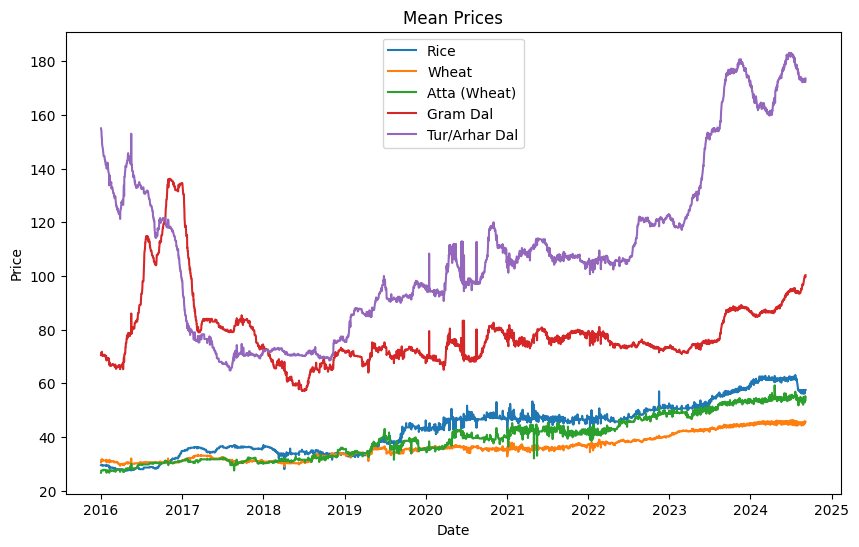

In [31]:
# plot data_mean and data_median
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_mean['Date'], data_mean['Rice'], label='Rice')
plt.plot(data_mean['Date'], data_mean['Wheat'], label='Wheat')
plt.plot(data_mean['Date'], data_mean['Atta (Wheat)'], label='Atta (Wheat)')
plt.plot(data_mean['Date'], data_mean['Gram Dal'], label='Gram Dal')
plt.plot(data_mean['Date'], data_mean['Tur/Arhar Dal'], label='Tur/Arhar Dal')
plt.title('Mean Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
